In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#importing the dataset
df=pd.read_csv("./Aggregation.csv")
print("Input data & shape")
print(df.shape)
df.head()

Input data & shape
(788, 3)


,v1,v2,output
0,15.55,28.65,2
1,14.90,27.55,2
2,14.45,28.35,2
3,14.15,28.80,2
4,13.75,28.05,2


In [3]:
df=df.drop('output',1)

In [4]:
# Euclidean Distance Caculator
def dist(a, b, ax=1):
    return np.linalg.norm(a - b, axis=ax)


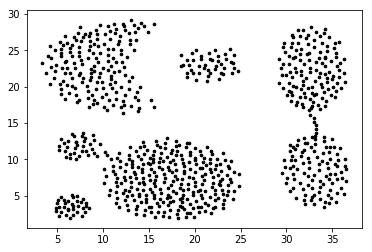

In [5]:
# Getting the values and plotting it
f1 = df['v1'].values
f2 = df['v2'].values
X = np.array(list(zip(f1,f2)))
plt.scatter(f1, f2, c='black', s=7)

In [6]:
print(X)

[[15.55 28.65]
 [14.9  27.55]
 [14.45 28.35]
 ...
 [ 8.5   3.25]
 [ 8.1   3.55]
 [ 8.15  4.  ]]


In [7]:
# calculate AvgDistance
def AvgDist(a):
    sum=0;
    for i in range(len(a)):
        for j in range(len(a)):
            if(j > i):
                #print(i,j)
                sum=sum+dist(a[i],a[j],None)
        #print(" ")
    #print("total sum is:",sum)
    AvgDist=(2/(len(a)*(len(a)-1)))*sum
    
    return AvgDist

In [8]:
#calculating epsilon neighbour value
epsilon=0.25*AvgDist(X)
print(epsilon)

4.05006702820805


In [9]:
# calculating density parameter
def DensityParameter(a):
    S=[]
    
    for i in range(len(a)):
        total=0
        for j in range(len(a)):
            if(i != j):
                sum=epsilon - dist(a[i],a[j],None)
                if (sum >=0):
                    sum=1
                else:
                    sum=0
                total=total+sum
        S.append(total)
    #index_max = np.argmax(S)
    #print (S)
    return S#a[index_max]       
    

In [10]:
#Storing density paremeter value 
final=DensityParameter(X)
#print(final)

In [11]:
#creating an array for storing initial cenroid
a=[]

In [12]:
#define K value 
k=10

In [13]:
#finding point with highest density parameter value
for i in range(k):
    index_max=np.argmax(final)
    print("index number:", index_max)
    print("original value at that index:",X[index_max])
    a.append(X[index_max])
    final[index_max]=-1
    for j in range(len(X)):
        if (dist(a[i],X[j],None) < epsilon):
            final[j]=-1
  
    print(" ")

index number: 375
original value at that index: [18.05  7.35]
 
index number: 266
original value at that index: [13.95  6.7 ]
 
index number: 635
original value at that index: [32.55 22.05]
 
index number: 50
original value at that index: [ 8.85 24.6 ]
 
index number: 251
original value at that index: [15.45 10.55]
 
index number: 407
original value at that index: [22.2   5.75]
 
index number: 540
original value at that index: [33.5  9.3]
 
index number: 323
original value at that index: [17.25  3.05]
 
index number: 442
original value at that index: [20.95 10.2 ]
 
index number: 99
original value at that index: [ 7.65 20.65]
 


In [14]:
#Initial centroids
C=np.array(list(a),dtype=np.float32)
print("Initial Centroids")
print(C)


Initial Centroids
[[18.05  7.35]
 [13.95  6.7 ]
 [32.55 22.05]
 [ 8.85 24.6 ]
 [15.45 10.55]
 [22.2   5.75]
 [33.5   9.3 ]
 [17.25  3.05]
 [20.95 10.2 ]
 [ 7.65 20.65]]


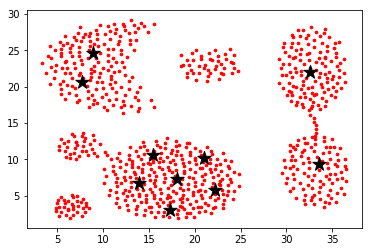

In [15]:
# Plotting along with the initial Centroids
plt.scatter(f1, f2, c='red', s=7)
plt.scatter(C[:,0], C[:,1], marker='*', s=200, c='black')


In [16]:
# To store the value of centroids when it updates
C_old = np.zeros(C.shape)
print(C_old)

[[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]


In [17]:
# Cluster Lables(0, 1, 2)
clusters = np.zeros(len(X))
print(clusters)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

In [18]:
clusters.shape

(788,)

In [19]:
# Error func. - Distance between new centroids and old centroids
error=dist(C,C_old,None)
print(error)

79.17010139205757


In [20]:
from copy import deepcopy

old centroid= [[18.05  7.35]
 [13.95  6.7 ]
 [32.55 22.05]
 [ 8.85 24.6 ]
 [15.45 10.55]
 [22.2   5.75]
 [33.5   9.3 ]
 [17.25  3.05]
 [20.95 10.2 ]
 [ 7.65 20.65]]
new centroid= [[18.187098   7.269355 ]
 [10.434403   5.9490824]
 [30.949026  22.345455 ]
 [11.014486  25.286917 ]
 [14.071875  11.272656 ]
 [22.17551    5.55     ]
 [33.140953   8.859048 ]
 [17.304878   3.4365854]
 [21.039024  10.797561 ]
 [ 8.433333  18.844254 ]]
count= 1
old centroid= [[18.187098   7.269355 ]
 [10.434403   5.9490824]
 [30.949026  22.345455 ]
 [11.014486  25.286917 ]
 [14.071875  11.272656 ]
 [22.17551    5.55     ]
 [33.140953   8.859048 ]
 [17.304878   3.4365854]
 [21.039024  10.797561 ]
 [ 8.433333  18.844254 ]]
new centroid= [[17.545652   7.4565215]
 [ 8.975883   5.9464707]
 [30.886774  22.335484 ]
 [11.39434   25.242924 ]
 [13.688983  10.715254 ]
 [22.201962   5.6911764]
 [33.140953   8.859048 ]
 [16.770588   3.6803923]
 [20.679487  10.335897 ]
 [ 8.481318  19.095604 ]]
count= 2
old centroid= [[17.545

new centroid= [[14.351471   9.816176 ]
 [ 6.62       3.632857 ]
 [32.69453   22.13789  ]
 [21.280851  23.021276 ]
 [ 8.6008625 13.995689 ]
 [20.827692   4.7161536]
 [33.142788   8.79375  ]
 [14.632639   4.9006944]
 [20.565151   9.426516 ]
 [ 9.073104  23.787586 ]]
count= 21
old centroid= [[14.351471   9.816176 ]
 [ 6.62       3.632857 ]
 [32.69453   22.13789  ]
 [21.280851  23.021276 ]
 [ 8.6008625 13.995689 ]
 [20.827692   4.7161536]
 [33.142788   8.79375  ]
 [14.632639   4.9006944]
 [20.565151   9.426516 ]
 [ 9.073104  23.787586 ]]
new centroid= [[14.351471   9.816176 ]
 [ 6.62       3.632857 ]
 [32.69453   22.13789  ]
 [21.280851  23.021276 ]
 [ 8.6040325 14.308871 ]
 [20.827692   4.7161536]
 [33.142788   8.79375  ]
 [14.632639   4.9006944]
 [20.565151   9.426516 ]
 [ 9.085107  23.92766  ]]
count= 22
old centroid= [[14.351471   9.816176 ]
 [ 6.62       3.632857 ]
 [32.69453   22.13789  ]
 [21.280851  23.021276 ]
 [ 8.6040325 14.308871 ]
 [20.827692   4.7161536]
 [33.142788   8.79375

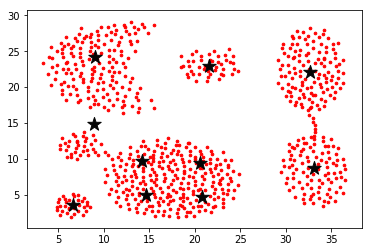

In [21]:
# Loop will run till the error becomes zero
count=0;
while error != 0:
    # Assigning each value to its closest cluster
    for i in range(len(X)):
        distances = dist(X[i], C)
       # print("distance=",distances,"X[i]=",X[i],"C=",C)
        cluster = np.argmin(distances)
       # print("cluster=",cluster)
        clusters[i] = cluster
    # Storing the old centroid values
    C_old = deepcopy(C)
    print("old centroid=",C_old)
    
    # Finding the new centroids by taking the average value
    for i in range(k):
        points = [X[j] for j in range(len(X)) if clusters[j] == i]
        C[i] = np.mean(points, axis=0)
    error = dist(C, C_old, None)
    print("new centroid=",C)
    count=count+1
    print("count=",count)
    
colors = ['r', 'g', 'b', 'y', 'c', 'm']
fig, ax = plt.subplots()
for i in range(k):
        points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
        ax.scatter(points[:, 0], points[:, 1], s=7, c="red")
ax.scatter(C[:, 0], C[:, 1], marker='*', s=200, c='#050505')


In [22]:
from sklearn.cluster import KMeans

# Number of clusters
kmeans = KMeans(n_clusters=10)
# Fitting the input data
kmeans = kmeans.fit(X)
# Getting the cluster labels
labels = kmeans.predict(X)
# Centroid values
centroids = kmeans.cluster_centers_

# Comparing with scikit-learn centroids
print("Centroid values")
print("Scratch")
print(C) # From Scratch
print("sklearn")
print(centroids) # From sci-kit learn

Centroid values
Scratch
[[14.227612   9.695522 ]
 [ 6.62       3.632857 ]
 [32.69453   22.13789  ]
 [21.543333  23.003334 ]
 [ 8.928986  14.88116  ]
 [20.827692   4.7161536]
 [33.142788   8.79375  ]
 [14.632639   4.9006944]
 [20.52015    9.454477 ]
 [ 9.075     24.173529 ]]
sklearn
[[ 7.67948718 11.52435897]
 [33.14278846  8.79375   ]
 [15.50064103  4.42884615]
 [32.69453125 22.13789062]
 [21.33431373  7.09852941]
 [ 9.37678571 25.95416667]
 [15.14294118  9.70764706]
 [21.54333333 23.00333333]
 [ 6.84054054  3.73108108]
 [ 9.35930233 20.01976744]]


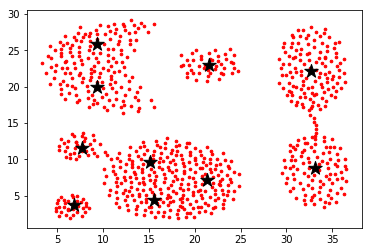

In [23]:
# Plotting along with the initial Centroids
plt.scatter(X[:,0], X[:,1], c='red', s=7)
plt.scatter(centroids[:,0], centroids[:,1], marker='*', s=200, c='black')


In [24]:
cen=np.array(np.mean(df))
print(cen)

[19.56681472 14.17176396]


In [25]:
difference=0
for i in range(k):
    difference=difference+dist(cen,C[i],None)
    print("cen=",cen,"C[i]=",C[i])
    print(difference)

cen= [19.56681472 14.17176396] C[i]= [14.227612  9.695522]
6.967340231813367
cen= [19.56681472 14.17176396] C[i]= [6.62     3.632857]
23.661308379042747
cen= [19.56681472 14.17176396] C[i]= [32.69453 22.13789]
39.01696151189876
cen= [19.56681472 14.17176396] C[i]= [21.543333 23.003334]
48.06700321921001
cen= [19.56681472 14.17176396] C[i]= [ 8.928986 14.88116 ]
58.72845954228029
cen= [19.56681472 14.17176396] C[i]= [20.827692   4.7161536]
68.26776656387582
cen= [19.56681472 14.17176396] C[i]= [33.142788  8.79375 ]
82.87016653328106
cen= [19.56681472 14.17176396] C[i]= [14.632639   4.9006944]
93.37249113540543
cen= [19.56681472 14.17176396] C[i]= [20.52015   9.454477]
98.1851452907598
cen= [19.56681472 14.17176396] C[i]= [ 9.075    24.173529]
112.68043685353442


In [26]:
G=(difference/k)
print(G)

11.268043685353442


In [27]:
#calculating Ti
total=0
for i in range(k):
        points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
        for j in range(len(points)):
            print("point=",points[j],"center=",C[i],"distance=",dist(points[j],C[i],None))
            total=total+dist(points[j],C[i],None)
        print(" ")

point= [10.4  10.55] center= [14.227612  9.695522] distance= 3.921828940692217
point= [10.9 10. ] center= [14.227612  9.695522] distance= 3.3415124176766966
point= [11.55 10.2 ] center= [14.227612  9.695522] distance= 2.7247204094870456
point= [11.75 10.85] center= [14.227612  9.695522] distance= 2.7333820977539065
point= [10.1   8.65] center= [14.227612  9.695522] distance= 4.257968287438081
point= [11.05  9.1 ] center= [14.227612  9.695522] distance= 3.232933950762441
point= [11.85  9.8 ] center= [14.227612  9.695522] distance= 2.379905929129578
point= [12.85 10.65] center= [14.227612  9.695522] distance= 1.6759597918254754
point= [12.9 11.7] center= [14.227612  9.695522] distance= 2.404263550883451
point= [13.6 11.1] center= [14.227612  9.695522] distance= 1.5383282594033594
point= [14.05 11.75] center= [14.227612  9.695522] distance= 2.062140743317787
point= [14.5 11.8] center= [14.227612  9.695522] distance= 2.122032475444953
point= [14.3  12.45] center= [14.227612  9.695522] dist

point= [36.35 20.6 ] center= [32.69453 22.13789] distance= 3.965799110880229
point= [35.5  20.55] center= [32.69453 22.13789] distance= 3.22367079616815
point= [34.45 20.65] center= [32.69453 22.13789] distance= 2.3011930498075226
point= [34.4  21.25] center= [32.69453 22.13789] distance= 1.9227518474092873
point= [35.   21.05] center= [32.69453 22.13789] distance= 2.549253621566005
point= [35.75 21.3 ] center= [32.69453 22.13789] distance= 3.1682729310219315
point= [35.05 21.5 ] center= [32.69453 22.13789] distance= 2.440315574368781
point= [34.6  22.05] center= [32.69453 22.13789] distance= 1.9074953977912354
point= [34.2  21.75] center= [32.69453 22.13789] distance= 1.5546372565584272
point= [36.25 21.95] center= [32.69453 22.13789] distance= 3.5604306000408212
point= [35.7 22.3] center= [32.69453 22.13789] distance= 3.0098383162607387
point= [35.5 22.9] center= [32.69453 22.13789] distance= 2.907141388096359
point= [35.85 23.25] center= [32.69453 22.13789] distance= 3.3457102095068

point= [11.95 17.25] center= [ 8.928986 14.88116 ] distance= 3.8390014336338307
point= [12.25 17.5 ] center= [ 8.928986 14.88116 ] distance= 4.229357014821036
point= [13.05 17.4 ] center= [ 8.928986 14.88116 ] distance= 4.829835997440579
point= [13.75 18.15] center= [ 8.928986 14.88116 ] distance= 5.824731431969542
point= [13.5  18.65] center= [ 8.928986 14.88116 ] distance= 5.924384294592633
point= [13.65 19.25] center= [ 8.928986 14.88116 ] distance= 6.432320098721248
point= [15.2 18.2] center= [ 8.928986 14.88116 ] distance= 7.095091405245878
point= [15.5  17.15] center= [ 8.928986 14.88116 ] distance= 6.951680820811061
point= [13.9 17.1] center= [ 8.928986 14.88116 ] distance= 5.443733656133751
point= [13.75 16.6 ] center= [ 8.928986 14.88116 ] distance= 5.118260601028823
point= [12.15 16.4 ] center= [ 8.928986 14.88116 ] distance= 3.561152818857652
point= [ 7.8 13.7] center= [ 8.928986 14.88116 ] distance= 1.6339360167666286
point= [ 8.85 13.35] center= [ 8.928986 14.88116 ] dista

point= [30.85  7.35] center= [33.142788  8.79375 ] distance= 2.70948150373216
point= [31.5   6.75] center= [33.142788  8.79375 ] distance= 2.6221490188069714
point= [31.75  5.95] center= [33.142788  8.79375 ] distance= 3.166507730131063
point= [32.35  6.45] center= [33.142788  8.79375 ] distance= 2.47420206848493
point= [32.8  6. ] center= [33.142788  8.79375 ] distance= 2.8147009723981493
point= [32.05  5.1 ] center= [33.142788  8.79375 ] distance= 3.852008972045724
point= [32.8  4.8] center= [33.142788  8.79375 ] distance= 4.008433747270299
point= [32.65  4.4 ] center= [33.142788  8.79375 ] distance= 4.421298150280346
point= [33.65  4.6 ] center= [33.142788  8.79375 ] distance= 4.224310777306416
point= [33.05  5.15] center= [33.142788  8.79375 ] distance= 3.644931038180971
point= [33.6   5.45] center= [33.142788  8.79375 ] distance= 3.3748637988593493
point= [34.5   5.05] center= [33.142788  8.79375 ] distance= 3.982171170132466
point= [34.9   4.65] center= [33.142788  8.79375 ] dist

point= [18.05  7.35] center= [20.52015   9.454477] distance= 3.245067329388229
point= [17.85  7.75] center= [20.52015   9.454477] distance= 3.167797313039635
point= [17.5   8.25] center= [20.52015   9.454477] distance= 3.2514715081006624
point= [17.6  9.9] center= [20.52015   9.454477] distance= 2.9539400803338562
point= [17.8  9.3] center= [20.52015   9.454477] distance= 2.724532084236994
point= [18.    8.55] center= [20.52015   9.454477] distance= 2.6775420353236217
point= [18.8  8.1] center= [20.52015   9.454477] distance= 2.1894113730764055
point= [18.8   8.35] center= [20.52015   9.454477] distance= 2.044207304914543
point= [19.4  7.6] center= [20.52015   9.454477] distance= 2.1665226501443606
point= [19.8  7.5] center= [20.52015   9.454477] distance= 2.082929780587681
point= [21.    7.15] center= [20.52015   9.454477] distance= 2.353905782670291
point= [20.75  7.65] center= [20.52015   9.454477] distance= 1.8190573764965434
point= [20.   8.2] center= [20.52015   9.454477] distanc

point= [ 6.6 20.1] center= [ 9.075    24.173529] distance= 4.766472478833544
point= [ 6.05 20.2 ] center= [ 9.075    24.173529] distance= 4.993951736592607
point= [ 5.4  19.65] center= [ 9.075    24.173529] distance= 5.828201715611096
point= [ 8.2  20.05] center= [ 9.075    24.173529] distance= 4.215342615844603
point= [ 8.6 20.9] center= [ 9.075    24.173529] distance= 3.307811176653471
point= [ 8.65 21.3 ] center= [ 9.075    24.173529] distance= 2.9047877482624056
point= [ 8.65 21.9 ] center= [ 9.075    24.173529] distance= 2.3129110352406137
point= [ 8.65 22.5 ] center= [ 9.075    24.173529] distance= 1.7266508191931054
point= [ 8.95 22.8 ] center= [ 9.075    24.173529] distance= 1.3792048300025452
point= [ 9.95 22.65] center= [ 9.075    24.173529] distance= 1.7569191631806726
point= [ 8.95 22.2 ] center= [ 9.075    24.173529] distance= 1.9774833421851958
point= [ 9.65 21.9 ] center= [ 9.075    24.173529] distance= 2.3451136088487345
point= [10.55 22.3 ] center= [ 9.075    24.173529

In [28]:
print(total)
T=total/df.shape[0]
print(T)

2282.090824867136
2.896054346278091


In [29]:
VCVI=G+T
print(VCVI)

14.164098031631532


In [30]:
for j in range(k):
    for i in range(len(clusters)):
        print("cluster=",j,"clusters[i]=",clusters[i])

cluster= 0 clusters[i]= 9.0
cluster= 0 clusters[i]= 9.0
cluster= 0 clusters[i]= 9.0
cluster= 0 clusters[i]= 9.0
cluster= 0 clusters[i]= 9.0
cluster= 0 clusters[i]= 9.0
cluster= 0 clusters[i]= 9.0
cluster= 0 clusters[i]= 9.0
cluster= 0 clusters[i]= 9.0
cluster= 0 clusters[i]= 9.0
cluster= 0 clusters[i]= 9.0
cluster= 0 clusters[i]= 9.0
cluster= 0 clusters[i]= 9.0
cluster= 0 clusters[i]= 9.0
cluster= 0 clusters[i]= 9.0
cluster= 0 clusters[i]= 9.0
cluster= 0 clusters[i]= 9.0
cluster= 0 clusters[i]= 9.0
cluster= 0 clusters[i]= 9.0
cluster= 0 clusters[i]= 9.0
cluster= 0 clusters[i]= 9.0
cluster= 0 clusters[i]= 9.0
cluster= 0 clusters[i]= 9.0
cluster= 0 clusters[i]= 9.0
cluster= 0 clusters[i]= 9.0
cluster= 0 clusters[i]= 9.0
cluster= 0 clusters[i]= 9.0
cluster= 0 clusters[i]= 9.0
cluster= 0 clusters[i]= 9.0
cluster= 0 clusters[i]= 9.0
cluster= 0 clusters[i]= 9.0
cluster= 0 clusters[i]= 9.0
cluster= 0 clusters[i]= 9.0
cluster= 0 clusters[i]= 9.0
cluster= 0 clusters[i]= 9.0
cluster= 0 clusters[

cluster= 0 clusters[i]= 7.0
cluster= 0 clusters[i]= 7.0
cluster= 0 clusters[i]= 7.0
cluster= 0 clusters[i]= 7.0
cluster= 0 clusters[i]= 7.0
cluster= 0 clusters[i]= 7.0
cluster= 0 clusters[i]= 7.0
cluster= 0 clusters[i]= 7.0
cluster= 0 clusters[i]= 7.0
cluster= 0 clusters[i]= 7.0
cluster= 0 clusters[i]= 5.0
cluster= 0 clusters[i]= 5.0
cluster= 0 clusters[i]= 5.0
cluster= 0 clusters[i]= 5.0
cluster= 0 clusters[i]= 5.0
cluster= 0 clusters[i]= 5.0
cluster= 0 clusters[i]= 5.0
cluster= 0 clusters[i]= 5.0
cluster= 0 clusters[i]= 5.0
cluster= 0 clusters[i]= 5.0
cluster= 0 clusters[i]= 5.0
cluster= 0 clusters[i]= 5.0
cluster= 0 clusters[i]= 5.0
cluster= 0 clusters[i]= 5.0
cluster= 0 clusters[i]= 5.0
cluster= 0 clusters[i]= 5.0
cluster= 0 clusters[i]= 5.0
cluster= 0 clusters[i]= 5.0
cluster= 0 clusters[i]= 5.0
cluster= 0 clusters[i]= 7.0
cluster= 0 clusters[i]= 7.0
cluster= 0 clusters[i]= 7.0
cluster= 0 clusters[i]= 7.0
cluster= 0 clusters[i]= 7.0
cluster= 0 clusters[i]= 0.0
cluster= 0 clusters[

cluster= 0 clusters[i]= 2.0
cluster= 0 clusters[i]= 2.0
cluster= 0 clusters[i]= 2.0
cluster= 0 clusters[i]= 2.0
cluster= 0 clusters[i]= 2.0
cluster= 0 clusters[i]= 2.0
cluster= 0 clusters[i]= 2.0
cluster= 0 clusters[i]= 2.0
cluster= 0 clusters[i]= 2.0
cluster= 0 clusters[i]= 2.0
cluster= 0 clusters[i]= 2.0
cluster= 0 clusters[i]= 2.0
cluster= 0 clusters[i]= 2.0
cluster= 0 clusters[i]= 2.0
cluster= 0 clusters[i]= 2.0
cluster= 0 clusters[i]= 2.0
cluster= 0 clusters[i]= 2.0
cluster= 0 clusters[i]= 3.0
cluster= 0 clusters[i]= 3.0
cluster= 0 clusters[i]= 3.0
cluster= 0 clusters[i]= 3.0
cluster= 0 clusters[i]= 3.0
cluster= 0 clusters[i]= 3.0
cluster= 0 clusters[i]= 3.0
cluster= 0 clusters[i]= 3.0
cluster= 0 clusters[i]= 3.0
cluster= 0 clusters[i]= 3.0
cluster= 0 clusters[i]= 3.0
cluster= 0 clusters[i]= 3.0
cluster= 0 clusters[i]= 3.0
cluster= 0 clusters[i]= 3.0
cluster= 0 clusters[i]= 3.0
cluster= 0 clusters[i]= 3.0
cluster= 0 clusters[i]= 3.0
cluster= 0 clusters[i]= 3.0
cluster= 0 clusters[

cluster= 1 clusters[i]= 5.0
cluster= 1 clusters[i]= 5.0
cluster= 1 clusters[i]= 5.0
cluster= 1 clusters[i]= 5.0
cluster= 1 clusters[i]= 5.0
cluster= 1 clusters[i]= 5.0
cluster= 1 clusters[i]= 5.0
cluster= 1 clusters[i]= 8.0
cluster= 1 clusters[i]= 8.0
cluster= 1 clusters[i]= 8.0
cluster= 1 clusters[i]= 8.0
cluster= 1 clusters[i]= 8.0
cluster= 1 clusters[i]= 8.0
cluster= 1 clusters[i]= 8.0
cluster= 1 clusters[i]= 0.0
cluster= 1 clusters[i]= 0.0
cluster= 1 clusters[i]= 8.0
cluster= 1 clusters[i]= 8.0
cluster= 1 clusters[i]= 8.0
cluster= 1 clusters[i]= 8.0
cluster= 1 clusters[i]= 8.0
cluster= 1 clusters[i]= 8.0
cluster= 1 clusters[i]= 8.0
cluster= 1 clusters[i]= 8.0
cluster= 1 clusters[i]= 8.0
cluster= 1 clusters[i]= 8.0
cluster= 1 clusters[i]= 8.0
cluster= 1 clusters[i]= 8.0
cluster= 1 clusters[i]= 8.0
cluster= 1 clusters[i]= 8.0
cluster= 1 clusters[i]= 8.0
cluster= 1 clusters[i]= 8.0
cluster= 1 clusters[i]= 8.0
cluster= 1 clusters[i]= 8.0
cluster= 1 clusters[i]= 8.0
cluster= 1 clusters[

cluster= 2 clusters[i]= 4.0
cluster= 2 clusters[i]= 4.0
cluster= 2 clusters[i]= 4.0
cluster= 2 clusters[i]= 4.0
cluster= 2 clusters[i]= 4.0
cluster= 2 clusters[i]= 9.0
cluster= 2 clusters[i]= 9.0
cluster= 2 clusters[i]= 9.0
cluster= 2 clusters[i]= 9.0
cluster= 2 clusters[i]= 9.0
cluster= 2 clusters[i]= 9.0
cluster= 2 clusters[i]= 9.0
cluster= 2 clusters[i]= 9.0
cluster= 2 clusters[i]= 9.0
cluster= 2 clusters[i]= 9.0
cluster= 2 clusters[i]= 9.0
cluster= 2 clusters[i]= 9.0
cluster= 2 clusters[i]= 9.0
cluster= 2 clusters[i]= 9.0
cluster= 2 clusters[i]= 9.0
cluster= 2 clusters[i]= 9.0
cluster= 2 clusters[i]= 9.0
cluster= 2 clusters[i]= 9.0
cluster= 2 clusters[i]= 9.0
cluster= 2 clusters[i]= 9.0
cluster= 2 clusters[i]= 9.0
cluster= 2 clusters[i]= 9.0
cluster= 2 clusters[i]= 9.0
cluster= 2 clusters[i]= 9.0
cluster= 2 clusters[i]= 9.0
cluster= 2 clusters[i]= 9.0
cluster= 2 clusters[i]= 9.0
cluster= 2 clusters[i]= 9.0
cluster= 2 clusters[i]= 9.0
cluster= 2 clusters[i]= 4.0
cluster= 2 clusters[

cluster= 2 clusters[i]= 2.0
cluster= 2 clusters[i]= 2.0
cluster= 2 clusters[i]= 2.0
cluster= 2 clusters[i]= 2.0
cluster= 2 clusters[i]= 2.0
cluster= 2 clusters[i]= 2.0
cluster= 2 clusters[i]= 2.0
cluster= 2 clusters[i]= 2.0
cluster= 2 clusters[i]= 2.0
cluster= 2 clusters[i]= 2.0
cluster= 2 clusters[i]= 2.0
cluster= 2 clusters[i]= 2.0
cluster= 2 clusters[i]= 2.0
cluster= 2 clusters[i]= 2.0
cluster= 2 clusters[i]= 2.0
cluster= 2 clusters[i]= 2.0
cluster= 2 clusters[i]= 2.0
cluster= 2 clusters[i]= 2.0
cluster= 2 clusters[i]= 2.0
cluster= 2 clusters[i]= 2.0
cluster= 2 clusters[i]= 2.0
cluster= 2 clusters[i]= 2.0
cluster= 2 clusters[i]= 2.0
cluster= 2 clusters[i]= 2.0
cluster= 2 clusters[i]= 2.0
cluster= 2 clusters[i]= 2.0
cluster= 2 clusters[i]= 2.0
cluster= 2 clusters[i]= 2.0
cluster= 2 clusters[i]= 2.0
cluster= 2 clusters[i]= 2.0
cluster= 2 clusters[i]= 2.0
cluster= 2 clusters[i]= 2.0
cluster= 2 clusters[i]= 2.0
cluster= 2 clusters[i]= 2.0
cluster= 2 clusters[i]= 2.0
cluster= 2 clusters[

cluster= 3 clusters[i]= 5.0
cluster= 3 clusters[i]= 5.0
cluster= 3 clusters[i]= 5.0
cluster= 3 clusters[i]= 5.0
cluster= 3 clusters[i]= 5.0
cluster= 3 clusters[i]= 5.0
cluster= 3 clusters[i]= 5.0
cluster= 3 clusters[i]= 5.0
cluster= 3 clusters[i]= 5.0
cluster= 3 clusters[i]= 5.0
cluster= 3 clusters[i]= 5.0
cluster= 3 clusters[i]= 5.0
cluster= 3 clusters[i]= 5.0
cluster= 3 clusters[i]= 5.0
cluster= 3 clusters[i]= 5.0
cluster= 3 clusters[i]= 5.0
cluster= 3 clusters[i]= 5.0
cluster= 3 clusters[i]= 5.0
cluster= 3 clusters[i]= 5.0
cluster= 3 clusters[i]= 7.0
cluster= 3 clusters[i]= 7.0
cluster= 3 clusters[i]= 7.0
cluster= 3 clusters[i]= 7.0
cluster= 3 clusters[i]= 7.0
cluster= 3 clusters[i]= 0.0
cluster= 3 clusters[i]= 0.0
cluster= 3 clusters[i]= 5.0
cluster= 3 clusters[i]= 5.0
cluster= 3 clusters[i]= 5.0
cluster= 3 clusters[i]= 5.0
cluster= 3 clusters[i]= 5.0
cluster= 3 clusters[i]= 5.0
cluster= 3 clusters[i]= 5.0
cluster= 3 clusters[i]= 5.0
cluster= 3 clusters[i]= 5.0
cluster= 3 clusters[

cluster= 3 clusters[i]= 2.0
cluster= 3 clusters[i]= 2.0
cluster= 3 clusters[i]= 2.0
cluster= 3 clusters[i]= 2.0
cluster= 3 clusters[i]= 2.0
cluster= 3 clusters[i]= 2.0
cluster= 3 clusters[i]= 2.0
cluster= 3 clusters[i]= 3.0
cluster= 3 clusters[i]= 3.0
cluster= 3 clusters[i]= 3.0
cluster= 3 clusters[i]= 3.0
cluster= 3 clusters[i]= 3.0
cluster= 3 clusters[i]= 3.0
cluster= 3 clusters[i]= 3.0
cluster= 3 clusters[i]= 3.0
cluster= 3 clusters[i]= 3.0
cluster= 3 clusters[i]= 3.0
cluster= 3 clusters[i]= 3.0
cluster= 3 clusters[i]= 3.0
cluster= 3 clusters[i]= 3.0
cluster= 3 clusters[i]= 3.0
cluster= 3 clusters[i]= 3.0
cluster= 3 clusters[i]= 3.0
cluster= 3 clusters[i]= 3.0
cluster= 3 clusters[i]= 3.0
cluster= 3 clusters[i]= 3.0
cluster= 3 clusters[i]= 3.0
cluster= 3 clusters[i]= 3.0
cluster= 3 clusters[i]= 3.0
cluster= 3 clusters[i]= 3.0
cluster= 3 clusters[i]= 3.0
cluster= 3 clusters[i]= 3.0
cluster= 3 clusters[i]= 3.0
cluster= 3 clusters[i]= 3.0
cluster= 3 clusters[i]= 3.0
cluster= 3 clusters[

cluster= 4 clusters[i]= 8.0
cluster= 4 clusters[i]= 8.0
cluster= 4 clusters[i]= 8.0
cluster= 4 clusters[i]= 8.0
cluster= 4 clusters[i]= 0.0
cluster= 4 clusters[i]= 0.0
cluster= 4 clusters[i]= 8.0
cluster= 4 clusters[i]= 8.0
cluster= 4 clusters[i]= 8.0
cluster= 4 clusters[i]= 8.0
cluster= 4 clusters[i]= 8.0
cluster= 4 clusters[i]= 8.0
cluster= 4 clusters[i]= 8.0
cluster= 4 clusters[i]= 8.0
cluster= 4 clusters[i]= 8.0
cluster= 4 clusters[i]= 8.0
cluster= 4 clusters[i]= 8.0
cluster= 4 clusters[i]= 8.0
cluster= 4 clusters[i]= 8.0
cluster= 4 clusters[i]= 8.0
cluster= 4 clusters[i]= 8.0
cluster= 4 clusters[i]= 8.0
cluster= 4 clusters[i]= 8.0
cluster= 4 clusters[i]= 8.0
cluster= 4 clusters[i]= 8.0
cluster= 4 clusters[i]= 8.0
cluster= 4 clusters[i]= 8.0
cluster= 4 clusters[i]= 8.0
cluster= 4 clusters[i]= 8.0
cluster= 4 clusters[i]= 8.0
cluster= 4 clusters[i]= 8.0
cluster= 4 clusters[i]= 8.0
cluster= 4 clusters[i]= 8.0
cluster= 4 clusters[i]= 8.0
cluster= 4 clusters[i]= 8.0
cluster= 4 clusters[

cluster= 5 clusters[i]= 9.0
cluster= 5 clusters[i]= 9.0
cluster= 5 clusters[i]= 9.0
cluster= 5 clusters[i]= 9.0
cluster= 5 clusters[i]= 9.0
cluster= 5 clusters[i]= 9.0
cluster= 5 clusters[i]= 9.0
cluster= 5 clusters[i]= 9.0
cluster= 5 clusters[i]= 9.0
cluster= 5 clusters[i]= 9.0
cluster= 5 clusters[i]= 9.0
cluster= 5 clusters[i]= 9.0
cluster= 5 clusters[i]= 9.0
cluster= 5 clusters[i]= 9.0
cluster= 5 clusters[i]= 9.0
cluster= 5 clusters[i]= 9.0
cluster= 5 clusters[i]= 9.0
cluster= 5 clusters[i]= 9.0
cluster= 5 clusters[i]= 9.0
cluster= 5 clusters[i]= 9.0
cluster= 5 clusters[i]= 9.0
cluster= 5 clusters[i]= 9.0
cluster= 5 clusters[i]= 9.0
cluster= 5 clusters[i]= 9.0
cluster= 5 clusters[i]= 4.0
cluster= 5 clusters[i]= 4.0
cluster= 5 clusters[i]= 4.0
cluster= 5 clusters[i]= 4.0
cluster= 5 clusters[i]= 4.0
cluster= 5 clusters[i]= 4.0
cluster= 5 clusters[i]= 9.0
cluster= 5 clusters[i]= 4.0
cluster= 5 clusters[i]= 4.0
cluster= 5 clusters[i]= 4.0
cluster= 5 clusters[i]= 4.0
cluster= 5 clusters[

cluster= 5 clusters[i]= 2.0
cluster= 5 clusters[i]= 2.0
cluster= 5 clusters[i]= 2.0
cluster= 5 clusters[i]= 2.0
cluster= 5 clusters[i]= 2.0
cluster= 5 clusters[i]= 2.0
cluster= 5 clusters[i]= 2.0
cluster= 5 clusters[i]= 2.0
cluster= 5 clusters[i]= 2.0
cluster= 5 clusters[i]= 2.0
cluster= 5 clusters[i]= 2.0
cluster= 5 clusters[i]= 2.0
cluster= 5 clusters[i]= 2.0
cluster= 5 clusters[i]= 2.0
cluster= 5 clusters[i]= 2.0
cluster= 5 clusters[i]= 2.0
cluster= 5 clusters[i]= 2.0
cluster= 5 clusters[i]= 2.0
cluster= 5 clusters[i]= 2.0
cluster= 5 clusters[i]= 2.0
cluster= 5 clusters[i]= 2.0
cluster= 5 clusters[i]= 2.0
cluster= 5 clusters[i]= 2.0
cluster= 5 clusters[i]= 2.0
cluster= 5 clusters[i]= 2.0
cluster= 5 clusters[i]= 2.0
cluster= 5 clusters[i]= 2.0
cluster= 5 clusters[i]= 2.0
cluster= 5 clusters[i]= 2.0
cluster= 5 clusters[i]= 2.0
cluster= 5 clusters[i]= 2.0
cluster= 5 clusters[i]= 2.0
cluster= 5 clusters[i]= 2.0
cluster= 5 clusters[i]= 2.0
cluster= 5 clusters[i]= 2.0
cluster= 5 clusters[

cluster= 6 clusters[i]= 5.0
cluster= 6 clusters[i]= 5.0
cluster= 6 clusters[i]= 5.0
cluster= 6 clusters[i]= 5.0
cluster= 6 clusters[i]= 5.0
cluster= 6 clusters[i]= 5.0
cluster= 6 clusters[i]= 5.0
cluster= 6 clusters[i]= 5.0
cluster= 6 clusters[i]= 5.0
cluster= 6 clusters[i]= 5.0
cluster= 6 clusters[i]= 5.0
cluster= 6 clusters[i]= 5.0
cluster= 6 clusters[i]= 5.0
cluster= 6 clusters[i]= 5.0
cluster= 6 clusters[i]= 5.0
cluster= 6 clusters[i]= 5.0
cluster= 6 clusters[i]= 8.0
cluster= 6 clusters[i]= 8.0
cluster= 6 clusters[i]= 8.0
cluster= 6 clusters[i]= 8.0
cluster= 6 clusters[i]= 8.0
cluster= 6 clusters[i]= 8.0
cluster= 6 clusters[i]= 8.0
cluster= 6 clusters[i]= 0.0
cluster= 6 clusters[i]= 0.0
cluster= 6 clusters[i]= 8.0
cluster= 6 clusters[i]= 8.0
cluster= 6 clusters[i]= 8.0
cluster= 6 clusters[i]= 8.0
cluster= 6 clusters[i]= 8.0
cluster= 6 clusters[i]= 8.0
cluster= 6 clusters[i]= 8.0
cluster= 6 clusters[i]= 8.0
cluster= 6 clusters[i]= 8.0
cluster= 6 clusters[i]= 8.0
cluster= 6 clusters[

cluster= 7 clusters[i]= 4.0
cluster= 7 clusters[i]= 4.0
cluster= 7 clusters[i]= 4.0
cluster= 7 clusters[i]= 4.0
cluster= 7 clusters[i]= 4.0
cluster= 7 clusters[i]= 4.0
cluster= 7 clusters[i]= 4.0
cluster= 7 clusters[i]= 4.0
cluster= 7 clusters[i]= 4.0
cluster= 7 clusters[i]= 4.0
cluster= 7 clusters[i]= 4.0
cluster= 7 clusters[i]= 4.0
cluster= 7 clusters[i]= 4.0
cluster= 7 clusters[i]= 4.0
cluster= 7 clusters[i]= 4.0
cluster= 7 clusters[i]= 4.0
cluster= 7 clusters[i]= 4.0
cluster= 7 clusters[i]= 4.0
cluster= 7 clusters[i]= 4.0
cluster= 7 clusters[i]= 4.0
cluster= 7 clusters[i]= 4.0
cluster= 7 clusters[i]= 4.0
cluster= 7 clusters[i]= 4.0
cluster= 7 clusters[i]= 4.0
cluster= 7 clusters[i]= 4.0
cluster= 7 clusters[i]= 4.0
cluster= 7 clusters[i]= 4.0
cluster= 7 clusters[i]= 4.0
cluster= 7 clusters[i]= 4.0
cluster= 7 clusters[i]= 4.0
cluster= 7 clusters[i]= 4.0
cluster= 7 clusters[i]= 0.0
cluster= 7 clusters[i]= 0.0
cluster= 7 clusters[i]= 0.0
cluster= 7 clusters[i]= 0.0
cluster= 7 clusters[

cluster= 7 clusters[i]= 6.0
cluster= 7 clusters[i]= 6.0
cluster= 7 clusters[i]= 6.0
cluster= 7 clusters[i]= 6.0
cluster= 7 clusters[i]= 6.0
cluster= 7 clusters[i]= 6.0
cluster= 7 clusters[i]= 6.0
cluster= 7 clusters[i]= 6.0
cluster= 7 clusters[i]= 6.0
cluster= 7 clusters[i]= 6.0
cluster= 7 clusters[i]= 6.0
cluster= 7 clusters[i]= 6.0
cluster= 7 clusters[i]= 6.0
cluster= 7 clusters[i]= 6.0
cluster= 7 clusters[i]= 6.0
cluster= 7 clusters[i]= 6.0
cluster= 7 clusters[i]= 6.0
cluster= 7 clusters[i]= 6.0
cluster= 7 clusters[i]= 6.0
cluster= 7 clusters[i]= 6.0
cluster= 7 clusters[i]= 6.0
cluster= 7 clusters[i]= 6.0
cluster= 7 clusters[i]= 6.0
cluster= 7 clusters[i]= 6.0
cluster= 7 clusters[i]= 6.0
cluster= 7 clusters[i]= 6.0
cluster= 7 clusters[i]= 6.0
cluster= 7 clusters[i]= 6.0
cluster= 7 clusters[i]= 6.0
cluster= 7 clusters[i]= 6.0
cluster= 7 clusters[i]= 6.0
cluster= 7 clusters[i]= 6.0
cluster= 7 clusters[i]= 6.0
cluster= 7 clusters[i]= 2.0
cluster= 7 clusters[i]= 2.0
cluster= 7 clusters[

cluster= 8 clusters[i]= 8.0
cluster= 8 clusters[i]= 8.0
cluster= 8 clusters[i]= 8.0
cluster= 8 clusters[i]= 8.0
cluster= 8 clusters[i]= 8.0
cluster= 8 clusters[i]= 8.0
cluster= 8 clusters[i]= 5.0
cluster= 8 clusters[i]= 5.0
cluster= 8 clusters[i]= 8.0
cluster= 8 clusters[i]= 5.0
cluster= 8 clusters[i]= 5.0
cluster= 8 clusters[i]= 5.0
cluster= 8 clusters[i]= 5.0
cluster= 8 clusters[i]= 5.0
cluster= 8 clusters[i]= 5.0
cluster= 8 clusters[i]= 5.0
cluster= 8 clusters[i]= 5.0
cluster= 8 clusters[i]= 5.0
cluster= 8 clusters[i]= 5.0
cluster= 8 clusters[i]= 5.0
cluster= 8 clusters[i]= 5.0
cluster= 8 clusters[i]= 5.0
cluster= 8 clusters[i]= 5.0
cluster= 8 clusters[i]= 5.0
cluster= 8 clusters[i]= 5.0
cluster= 8 clusters[i]= 8.0
cluster= 8 clusters[i]= 8.0
cluster= 8 clusters[i]= 8.0
cluster= 8 clusters[i]= 8.0
cluster= 8 clusters[i]= 8.0
cluster= 8 clusters[i]= 8.0
cluster= 8 clusters[i]= 8.0
cluster= 8 clusters[i]= 0.0
cluster= 8 clusters[i]= 0.0
cluster= 8 clusters[i]= 8.0
cluster= 8 clusters[

cluster= 9 clusters[i]= 9.0
cluster= 9 clusters[i]= 9.0
cluster= 9 clusters[i]= 9.0
cluster= 9 clusters[i]= 9.0
cluster= 9 clusters[i]= 9.0
cluster= 9 clusters[i]= 9.0
cluster= 9 clusters[i]= 9.0
cluster= 9 clusters[i]= 4.0
cluster= 9 clusters[i]= 4.0
cluster= 9 clusters[i]= 4.0
cluster= 9 clusters[i]= 4.0
cluster= 9 clusters[i]= 4.0
cluster= 9 clusters[i]= 4.0
cluster= 9 clusters[i]= 9.0
cluster= 9 clusters[i]= 4.0
cluster= 9 clusters[i]= 4.0
cluster= 9 clusters[i]= 4.0
cluster= 9 clusters[i]= 4.0
cluster= 9 clusters[i]= 4.0
cluster= 9 clusters[i]= 4.0
cluster= 9 clusters[i]= 4.0
cluster= 9 clusters[i]= 4.0
cluster= 9 clusters[i]= 4.0
cluster= 9 clusters[i]= 9.0
cluster= 9 clusters[i]= 9.0
cluster= 9 clusters[i]= 9.0
cluster= 9 clusters[i]= 9.0
cluster= 9 clusters[i]= 9.0
cluster= 9 clusters[i]= 9.0
cluster= 9 clusters[i]= 9.0
cluster= 9 clusters[i]= 9.0
cluster= 9 clusters[i]= 9.0
cluster= 9 clusters[i]= 9.0
cluster= 9 clusters[i]= 9.0
cluster= 9 clusters[i]= 9.0
cluster= 9 clusters[

cluster= 9 clusters[i]= 2.0
cluster= 9 clusters[i]= 2.0
cluster= 9 clusters[i]= 2.0
cluster= 9 clusters[i]= 2.0
cluster= 9 clusters[i]= 2.0
cluster= 9 clusters[i]= 2.0
cluster= 9 clusters[i]= 2.0
cluster= 9 clusters[i]= 2.0
cluster= 9 clusters[i]= 2.0
cluster= 9 clusters[i]= 2.0
cluster= 9 clusters[i]= 2.0
cluster= 9 clusters[i]= 2.0
cluster= 9 clusters[i]= 2.0
cluster= 9 clusters[i]= 2.0
cluster= 9 clusters[i]= 2.0
cluster= 9 clusters[i]= 2.0
cluster= 9 clusters[i]= 2.0
cluster= 9 clusters[i]= 2.0
cluster= 9 clusters[i]= 2.0
cluster= 9 clusters[i]= 2.0
cluster= 9 clusters[i]= 2.0
cluster= 9 clusters[i]= 2.0
cluster= 9 clusters[i]= 2.0
cluster= 9 clusters[i]= 2.0
cluster= 9 clusters[i]= 2.0
cluster= 9 clusters[i]= 2.0
cluster= 9 clusters[i]= 2.0
cluster= 9 clusters[i]= 2.0
cluster= 9 clusters[i]= 2.0
cluster= 9 clusters[i]= 2.0
cluster= 9 clusters[i]= 2.0
cluster= 9 clusters[i]= 2.0
cluster= 9 clusters[i]= 2.0
cluster= 9 clusters[i]= 2.0
cluster= 9 clusters[i]= 2.0
cluster= 9 clusters[

In [31]:
clusters

array([9., 9., 9., 9., 9., 9., 9., 9., 9., 9., 9., 9., 9., 9., 9., 9., 9.,
       9., 9., 9., 9., 9., 9., 9., 9., 9., 9., 9., 9., 9., 9., 9., 9., 9.,
       9., 9., 9., 9., 9., 9., 9., 9., 9., 9., 9., 9., 9., 9., 9., 9., 9.,
       9., 9., 9., 9., 9., 9., 9., 9., 9., 9., 9., 9., 9., 9., 9., 9., 9.,
       9., 9., 9., 9., 9., 9., 9., 9., 9., 9., 9., 9., 9., 9., 9., 9., 9.,
       9., 9., 9., 9., 9., 9., 9., 9., 9., 9., 9., 9., 9., 9., 9., 9., 9.,
       9., 9., 4., 4., 4., 4., 4., 4., 9., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 9., 9., 9., 9., 9., 9., 9., 9., 9., 9., 9., 9., 9., 9., 9., 9.,
       9., 9., 9., 9., 9., 9., 9., 9., 9., 9., 9., 9., 9., 4., 4., 4., 4.,
       4., 4., 9., 4., 4., 4., 4., 4., 4., 4., 4., 9., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [32]:
tot=0
for i in range(k):
        points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
        for j in range(len(points)):
            print("point=",points[j],"center=",C[i],"distance=",dist(points[j],C[i],None))
            tot=tot+dist(points[j],C[i],None)
        print(" ")

point= [10.4  10.55] center= [14.227612  9.695522] distance= 3.921828940692217
point= [10.9 10. ] center= [14.227612  9.695522] distance= 3.3415124176766966
point= [11.55 10.2 ] center= [14.227612  9.695522] distance= 2.7247204094870456
point= [11.75 10.85] center= [14.227612  9.695522] distance= 2.7333820977539065
point= [10.1   8.65] center= [14.227612  9.695522] distance= 4.257968287438081
point= [11.05  9.1 ] center= [14.227612  9.695522] distance= 3.232933950762441
point= [11.85  9.8 ] center= [14.227612  9.695522] distance= 2.379905929129578
point= [12.85 10.65] center= [14.227612  9.695522] distance= 1.6759597918254754
point= [12.9 11.7] center= [14.227612  9.695522] distance= 2.404263550883451
point= [13.6 11.1] center= [14.227612  9.695522] distance= 1.5383282594033594
point= [14.05 11.75] center= [14.227612  9.695522] distance= 2.062140743317787
point= [14.5 11.8] center= [14.227612  9.695522] distance= 2.122032475444953
point= [14.3  12.45] center= [14.227612  9.695522] dist

point= [32.25 24.45] center= [32.69453 22.13789] distance= 2.3544554877696626
point= [32.5 24.7] center= [32.69453 22.13789] distance= 2.5694844754012687
point= [31.45 24.45] center= [32.69453 22.13789] distance= 2.6257778701149794
point= [31.55 25.2 ] center= [32.69453 22.13789] distance= 3.2690164472946024
point= [31.05 25.  ] center= [32.69453 22.13789] distance= 3.3009324386553858
point= [30.25 24.3 ] center= [32.69453 22.13789] distance= 3.263502650642257
point= [29.8 24.8] center= [32.69453 22.13789] distance= 3.9325738552559923
point= [29.6 25.5] center= [32.69453 22.13789] distance= 4.569453305919913
point= [29.7  26.05] center= [32.69453 22.13789] distance= 4.926643742884575
point= [30.5 25.5] center= [32.69453 22.13789] distance= 4.014940676806253
point= [30.65 26.  ] center= [32.69453 22.13789] distance= 4.369896981634092
point= [31.25 26.05] center= [32.69453 22.13789] distance= 4.170284649687121
point= [31.45 26.95] center= [32.69453 22.13789] distance= 4.970438623791951
p

point= [22.2   5.75] center= [20.827692   4.7161536] distance= 1.7181581689117609
point= [21.85  6.2 ] center= [20.827692   4.7161536] distance= 1.8019194366547693
point= [20.75  6.55] center= [20.827692   4.7161536] distance= 1.8354913759305713
point= [22.    6.75] center= [20.827692   4.7161536] distance= 2.347517212459834
point= [22.8   6.45] center= [20.827692   4.7161536] distance= 2.6260658759488082
point= [22.65  6.65] center= [20.827692   4.7161536] distance= 2.6571729611960615
point= [22.75  7.05] center= [20.827692   4.7161536] distance= 3.0235917121861067
point= [23.95  6.9 ] center= [20.827692   4.7161536] distance= 3.8102482927018997
point= [23.65  6.5 ] center= [20.827692   4.7161536] distance= 3.3387917228381907
point= [23.6  5.7] center= [20.827692   4.7161536] distance= 2.941707865570033
point= [24.3   5.65] center= [20.827692   4.7161536] distance= 3.5956907102696505
point= [24.8  6.4] center= [20.827692   4.7161536] distance= 4.314460478385303
 
point= [34.05  3.5 ] 

point= [15.35  5.5 ] center= [14.632639   4.9006944] distance= 0.9347588677030325
point= [15.15  5.95] center= [14.632639   4.9006944] distance= 1.1699165696819687
point= [15.5   6.75] center= [14.632639   4.9006944] distance= 2.0426077782317127
point= [15.7   6.35] center= [14.632639   4.9006944] distance= 1.7999295706773488
point= [16.2  5.9] center= [14.632639   4.9006944] distance= 1.8588255596927674
point= [16.35  5.35] center= [14.632639   4.9006944] distance= 1.7751632570785045
point= [16.2   4.55] center= [14.632639   4.9006944] distance= 1.606115581487062
point= [16.55  4.2 ] center= [14.632639   4.9006944] distance= 2.0413833712441867
point= [16.95  4.75] center= [14.632639   4.9006944] distance= 2.32225560954775
point= [17.05  5.1 ] center= [14.632639   4.9006944] distance= 2.425563289347914
point= [17.3  4.8] center= [14.632639   4.9006944] distance= 2.669261026418535
point= [17.3   4.15] center= [14.632639   4.9006944] distance= 2.770984862554763
point= [17.6  4.3] center=

point= [11.   19.85] center= [ 9.075    24.173529] distance= 4.732708094270838
point= [12.8  19.75] center= [ 9.075    24.173529] distance= 5.783012392038873
point= [14.  19.9] center= [ 9.075    24.173529] distance= 6.520634492352676
 


In [33]:
print(tot)

2282.090824867136
